In [1]:
# Name: Zita Lo
# Student Number: 20196119
# Program: MMA
# Cohort: Winter 2021
# Course Number: MMA 869
# Date: August 16, 2020


# Answer to Question 7 Task 2


In [2]:
# Import packages
import pandas as pd
from pandas_profiling import ProfileReport
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Allow better display for multiline code
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [3]:
# Read in data
df=pd.read_csv('OJ.csv',index_col=[0])

# Data Exploration

In [4]:
# Generate a Profile Report on the df to better understand the data. ONLY REQUIRE TO RUN ONCE

#profile = ProfileReport(df)
#profile.to_file('Orange Juice Profiling Report.html')

In [5]:
# Understand the data, features and class types: 1070 instances and 18 features
df.head()
df.info()
df.describe()

,Purchase,WeekofPurchase,StoreID,PriceCH,PriceMM,DiscCH,DiscMM,SpecialCH,SpecialMM,LoyalCH,SalePriceMM,SalePriceCH,PriceDiff,Store7,PctDiscMM,PctDiscCH,ListPriceDiff,STORE
1,CH,237,1,1.75,1.99,0.00,0.0,0,0,0.500000,1.99,1.75,0.24,No,0.000000,0.000000,0.24,1
2,CH,239,1,1.75,1.99,0.00,0.3,0,1,0.600000,1.69,1.75,-0.06,No,0.150754,0.000000,0.24,1
3,CH,245,1,1.86,2.09,0.17,0.0,0,0,0.680000,2.09,1.69,0.40,No,0.000000,0.091398,0.23,1
4,MM,227,1,1.69,1.69,0.00,0.0,0,0,0.400000,1.69,1.69,0.00,No,0.000000,0.000000,0.00,1
5,CH,228,7,1.69,1.69,0.00,0.0,0,0,0.956535,1.69,1.69,0.00,Yes,0.000000,0.000000,0.00,0


<class 'pandas.core.frame.DataFrame'>
Int64Index: 1070 entries, 1 to 1070
Data columns (total 18 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Purchase        1070 non-null   object 
 1   WeekofPurchase  1070 non-null   int64  
 2   StoreID         1070 non-null   int64  
 3   PriceCH         1070 non-null   float64
 4   PriceMM         1070 non-null   float64
 5   DiscCH          1070 non-null   float64
 6   DiscMM          1070 non-null   float64
 7   SpecialCH       1070 non-null   int64  
 8   SpecialMM       1070 non-null   int64  
 9   LoyalCH         1070 non-null   float64
 10  SalePriceMM     1070 non-null   float64
 11  SalePriceCH     1070 non-null   float64
 12  PriceDiff       1070 non-null   float64
 13  Store7          1070 non-null   object 
 14  PctDiscMM       1070 non-null   float64
 15  PctDiscCH       1070 non-null   float64
 16  ListPriceDiff   1070 non-null   float64
 17  STORE           1070 non-null   i

,WeekofPurchase,StoreID,PriceCH,PriceMM,DiscCH,DiscMM,SpecialCH,SpecialMM,LoyalCH,SalePriceMM,SalePriceCH,PriceDiff,PctDiscMM,PctDiscCH,ListPriceDiff,STORE
count,1070.000000,1070.000000,1070.000000,1070.000000,1070.000000,1070.000000,1070.000000,1070.000000,1070.000000,1070.000000,1070.000000,1070.000000,1070.000000,1070.000000,1070.000000,1070.000000
mean,254.381308,3.959813,1.867421,2.085411,0.051860,0.123364,0.147664,0.161682,0.565782,1.962047,1.815561,0.146486,0.059298,0.027314,0.217991,1.630841
std,15.558286,2.308984,0.101970,0.134386,0.117474,0.213834,0.354932,0.368331,0.307843,0.252697,0.143384,0.271563,0.101760,0.062232,0.107535,1.430387
min,227.000000,1.000000,1.690000,1.690000,0.000000,0.000000,0.000000,0.000000,0.000011,1.190000,1.390000,-0.670000,0.000000,0.000000,0.000000,0.000000
25%,240.000000,2.000000,1.790000,1.990000,0.000000,0.000000,0.000000,0.000000,0.325257,1.690000,1.750000,0.000000,0.000000,0.000000,0.140000,0.000000
50%,257.000000,3.000000,1.860000,2.090000,0.000000,0.000000,0.000000,0.000000,0.600000,2.090000,1.860000,0.230000,0.000000,0.000000,0.240000,2.000000
75%,268.000000,7.000000,1.990000,2.180000,0.000000,0.230000,0.000000,0.000000,0.850873,2.130000,1.890000,0.320000,0.112676,0.000000,0.300000,3.000000
max,278.000000,7.000000,2.090000,2.290000,0.500000,0.800000,1.000000,1.000000,0.999947,2.290000,2.090000,0.640000,0.402010,0.252688,0.440000,4.000000


In [6]:
# Understand how many features there are, and which are categorical vs numeric
n_features = df.shape[1]

cat_col_names = list(df.select_dtypes(include=np.object).columns)
num_col_names = list(df.select_dtypes(include=np.number).columns)

print('cat_col_names: {}'.format(cat_col_names))
print('num_col_names: {}'.format(num_col_names))

cat_col_names: ['Purchase', 'Store7']
num_col_names: ['WeekofPurchase', 'StoreID', 'PriceCH', 'PriceMM', 'DiscCH', 'DiscMM', 'SpecialCH', 'SpecialMM', 'LoyalCH', 'SalePriceMM', 'SalePriceCH', 'PriceDiff', 'PctDiscMM', 'PctDiscCH', 'ListPriceDiff', 'STORE']


In [7]:
# Descriptive stats of the categorical features: 2 categorical features
df.describe(include=[np.object]).transpose()

,count,unique,top,freq
Purchase,1070,2,CH,653
Store7,1070,2,No,714


In [8]:
# Descriptive stats of the numeric features: 16 numeric features
df.describe(include=[np.number]).transpose()

,count,mean,std,min,25%,50%,75%,max
WeekofPurchase,1070.0,254.381308,15.558286,227.000000,240.000000,257.00,268.000000,278.000000
StoreID,1070.0,3.959813,2.308984,1.000000,2.000000,3.00,7.000000,7.000000
PriceCH,1070.0,1.867421,0.101970,1.690000,1.790000,1.86,1.990000,2.090000
PriceMM,1070.0,2.085411,0.134386,1.690000,1.990000,2.09,2.180000,2.290000
DiscCH,1070.0,0.051860,0.117474,0.000000,0.000000,0.00,0.000000,0.500000
DiscMM,1070.0,0.123364,0.213834,0.000000,0.000000,0.00,0.230000,0.800000
SpecialCH,1070.0,0.147664,0.354932,0.000000,0.000000,0.00,0.000000,1.000000
SpecialMM,1070.0,0.161682,0.368331,0.000000,0.000000,0.00,0.000000,1.000000
LoyalCH,1070.0,0.565782,0.307843,0.000011,0.325257,0.60,0.850873,0.999947
SalePriceMM,1070.0,1.962047,0.252697,1.190000,1.690000,2.09,2.130000,2.290000


<AxesSubplot:>

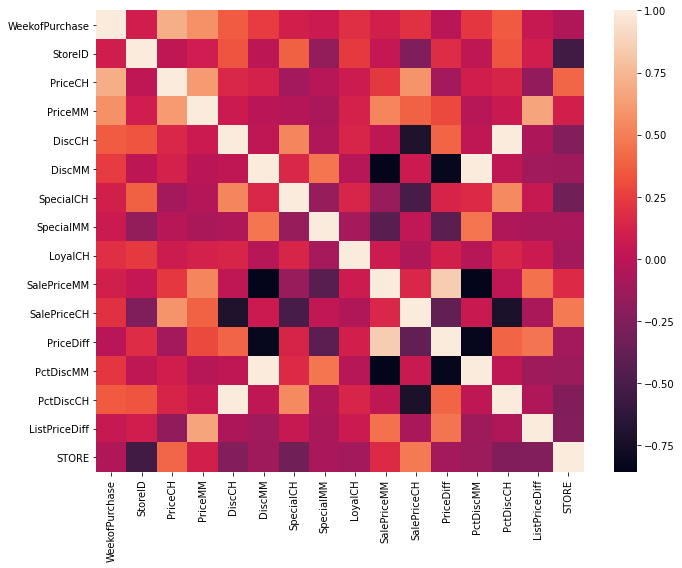

In [9]:
# Draw a correlation plot using seaborn heatmap. Understand the correlation between features
figure = plt.figure(figsize=(10, 8))
sns.heatmap(df.corr())
plt.tight_layout()

# Observation: Lots of highly correlated features found in the data. Need to take a closer look on some of those

In [10]:
# Display the number values on the correlation pairs
df.corr()

# Observations - For example these pairs have really high corr values: 
# 0.998793 DISCMM vs PctDiscMM
# 0.999022 DiscCH vs PctDiscCH
#-0.823908 DISCMM vs PriceDiff
# 0.846868 DISCMM vs SalePriceMM
# Will drop some of these features in the preprocessing data section

,WeekofPurchase,StoreID,PriceCH,PriceMM,DiscCH,DiscMM,SpecialCH,SpecialMM,LoyalCH,SalePriceMM,SalePriceCH,PriceDiff,PctDiscMM,PctDiscCH,ListPriceDiff,STORE
WeekofPurchase,1.000000,0.096046,0.704324,0.576872,0.365722,0.242334,0.107866,0.070688,0.192897,0.101719,0.201256,-0.011610,0.223533,0.355047,0.053038,-0.053652
StoreID,0.096046,1.000000,0.020815,0.093344,0.333182,0.010619,0.379360,-0.171641,0.237333,0.040655,-0.258172,0.174144,0.014302,0.334715,0.096913,-0.531597
PriceCH,0.704324,0.020815,1.000000,0.616402,0.151900,0.116310,-0.099056,-0.018026,0.077793,0.229383,0.586716,-0.096335,0.099157,0.134601,-0.177935,0.399570
PriceMM,0.576872,0.093344,0.616402,1.000000,0.065206,-0.001246,-0.031281,-0.068340,0.115570,0.532859,0.384941,0.292594,-0.021747,0.059964,0.665187,0.106612
DiscCH,0.365722,0.333182,0.151900,0.065206,1.000000,0.018035,0.534775,-0.046952,0.139400,0.019416,-0.711274,0.393615,0.014718,0.999022,-0.062551,-0.243812
DiscMM,0.242334,0.010619,0.116310,-0.001246,0.018035,1.000000,0.156636,0.465792,-0.020292,-0.846868,0.067940,-0.823908,0.998793,0.018521,-0.111848,-0.125917
SpecialCH,0.107866,0.379360,-0.099056,-0.031281,0.534775,0.156636,1.000000,-0.154170,0.137058,-0.149182,-0.508586,0.129713,0.160750,0.549015,0.054838,-0.321847
SpecialMM,0.070688,-0.171641,-0.018026,-0.068340,-0.046952,0.465792,-0.154170,1.000000,-0.088246,-0.430499,0.025648,-0.414135,0.466546,-0.051138,-0.068311,-0.083691
LoyalCH,0.192897,0.237333,0.077793,0.115570,0.139400,-0.020292,0.137058,-0.088246,1.000000,0.078631,-0.058887,0.104261,-0.022460,0.138684,0.070659,-0.103126
SalePriceMM,0.101719,0.040655,0.229383,0.532859,0.019416,-0.846868,-0.149182,-0.430499,0.078631,1.000000,0.147222,0.852798,-0.856749,0.016216,0.448395,0.163248


# Q7 Task 2a - Preprocess Data

In [11]:
# Convert StoreID class type from interger to object
df['StoreID'] = df['StoreID'].astype('object')

In [12]:
# Review and compare the three features related to 'store' before consolidating
# The plan is to make dummies for each storeID
df['StoreID'].value_counts()
df['STORE'].value_counts()
df['Store7'].value_counts()

7    356
2    222
3    196
1    157
4    139
Name: StoreID, dtype: int64

0    356
2    222
3    196
1    157
4    139
Name: STORE, dtype: int64

No     714
Yes    356
Name: Store7, dtype: int64

In [13]:
# Week of Purchase - Minimum value is 227. Deduct 226 from all values to make the value start from one
# The values then range from 1 to 52. A full year data

df['WkofPurchase'] = df['WeekofPurchase']-226
df.drop('WeekofPurchase', axis=1, inplace=True)

# One Hot encoding: Encode the value to four quarters instead of displaying them only from 1-52
df['Q1'] = np.where((df['WkofPurchase'] <=  13),1,0)
df['Q2'] = np.where((df['WkofPurchase'] >= 14) & (df['WkofPurchase'] <= 26),1,0)
df['Q3'] = np.where((df['WkofPurchase'] >= 27) & (df['WkofPurchase'] <= 39),1,0)
df['Q4'] = np.where((df['WkofPurchase'] >= 40) & (df['WkofPurchase'] <= 52),1,0)


In [14]:
# Review the changes and ensure they are correct. Choose random instances to view
df.sample(n=20, random_state=101).head(20)

,Purchase,StoreID,PriceCH,PriceMM,DiscCH,DiscMM,SpecialCH,SpecialMM,LoyalCH,SalePriceMM,...,Store7,PctDiscMM,PctDiscCH,ListPriceDiff,STORE,WkofPurchase,Q1,Q2,Q3,Q4
29,CH,7,1.86,2.13,0.47,0.54,1,0,0.932891,1.59,...,Yes,0.253521,0.252688,0.27,0,48,0,0,0,1
821,CH,7,1.99,2.13,0.50,0.00,0,1,0.988741,2.13,...,Yes,0.000000,0.251256,0.14,0,51,0,0,0,1
401,MM,3,1.99,2.09,0.00,0.40,0,0,0.343577,1.69,...,No,0.191388,0.000000,0.10,3,46,0,0,0,1
447,CH,7,1.75,1.99,0.00,0.40,1,0,0.524608,1.59,...,Yes,0.201005,0.000000,0.24,0,7,1,0,0,0
602,CH,7,1.86,2.13,0.00,0.24,0,0,0.964266,1.89,...,Yes,0.112676,0.000000,0.27,0,35,0,0,1,0
414,MM,3,1.79,2.09,0.00,0.00,0,0,0.181687,2.09,...,No,0.000000,0.000000,0.30,3,9,1,0,0,0
210,CH,7,1.86,2.18,0.00,0.00,0,0,0.904370,2.18,...,Yes,0.000000,0.000000,0.32,0,30,0,0,1,0
158,CH,4,1.99,2.09,0.10,0.00,0,0,0.946313,2.09,...,No,0.000000,0.050251,0.10,4,38,0,0,1,0
319,CH,3,1.99,2.23,0.00,0.00,0,0,0.708928,2.23,...,No,0.000000,0.000000,0.24,3,20,0,1,0,0
966,CH,1,1.69,1.99,0.00,0.00,0,0,0.435200,1.99,...,No,0.000000,0.000000,0.30,1,7,1,0,0,0


In [15]:
# Create dummies on the StoreID and Purchase features
df = pd.get_dummies(df,columns=['StoreID','Purchase'], prefix=['StoreID','Purchase'])

# View results
df.head()

,PriceCH,PriceMM,DiscCH,DiscMM,SpecialCH,SpecialMM,LoyalCH,SalePriceMM,SalePriceCH,PriceDiff,...,Q2,Q3,Q4,StoreID_1,StoreID_2,StoreID_3,StoreID_4,StoreID_7,Purchase_CH,Purchase_MM
1,1.75,1.99,0.00,0.0,0,0,0.500000,1.99,1.75,0.24,...,0,0,0,1,0,0,0,0,1,0
2,1.75,1.99,0.00,0.3,0,1,0.600000,1.69,1.75,-0.06,...,0,0,0,1,0,0,0,0,1,0
3,1.86,2.09,0.17,0.0,0,0,0.680000,2.09,1.69,0.40,...,1,0,0,1,0,0,0,0,1,0
4,1.69,1.69,0.00,0.0,0,0,0.400000,1.69,1.69,0.00,...,0,0,0,1,0,0,0,0,0,1
5,1.69,1.69,0.00,0.0,0,0,0.956535,1.69,1.69,0.00,...,0,0,0,0,0,0,0,1,1,0


In [16]:
# Drop features e.g. 'Store7','STORE','WkofPurchase' that have same info as other features
# Drop feature 'Purchase_MM','StoreID_4','Q2' to avoid collinearity after creating dummies. 'Purchase_CH' will be the target
# Drop features that have high collinearity with other features and features that are displaying same info as other features
# e.g. 'PriceCH' &'PriceMM' vs 'ListPriceDiff' - 'ListPriceDiff' are the differences of 'PriceCH' &'PriceMM'. Thus 'PriceCH' &'PriceMM' can be removed 
# e.g. 'SalePriceCH' &'SalePriceMM' vs 'PriceDiff' - 'PriceDiff' are the differences of 'SalePriceCH' &'SalePriceMM'. Thus 'SalePriceCH' &'SalePriceMM' can be removed
# e.g. 'PctDiscCH' & PctDiscMM' vs 'DiscCH' &'DiscMM' - These pairs are presenting in diff way but same info. One pair can be removed

df.drop(['Store7','STORE','Purchase_MM','PriceCH','PriceMM','SalePriceCH','SalePriceMM','PctDiscCH','PctDiscMM','StoreID_4','WkofPurchase','Q2'], axis=1, inplace=True)


<AxesSubplot:>

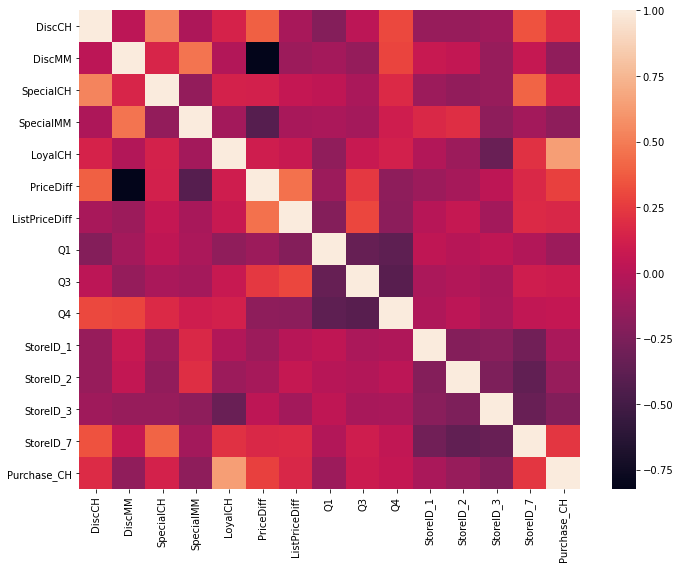

In [17]:
# Plot correlation heatmap again after the data preprocessing to review

figure = plt.figure(figsize=(10, 8))
sns.heatmap(df.corr())
plt.tight_layout()

In [18]:
# Plot correlation values again to review
df.corr()

,DiscCH,DiscMM,SpecialCH,SpecialMM,LoyalCH,PriceDiff,ListPriceDiff,Q1,Q3,Q4,StoreID_1,StoreID_2,StoreID_3,StoreID_7,Purchase_CH
DiscCH,1.000000,0.018035,0.534775,-0.046952,0.139400,0.393615,-0.062551,-0.215464,0.022045,0.303715,-0.135011,-0.133137,-0.100096,0.338822,0.181249
DiscMM,0.018035,1.000000,0.156636,0.465792,-0.020292,-0.823908,-0.111848,-0.078997,-0.144398,0.294634,0.070832,0.048666,-0.133158,0.062012,-0.166921
SpecialCH,0.534775,0.156636,1.000000,-0.154170,0.137058,0.129713,0.054838,0.036352,-0.054737,0.179365,-0.113041,-0.160993,-0.135814,0.404961,0.132751
SpecialMM,-0.046952,0.465792,-0.154170,1.000000,-0.088246,-0.414135,-0.068311,-0.051712,-0.076128,0.108960,0.169427,0.200994,-0.168593,-0.083824,-0.174784
LoyalCH,0.139400,-0.020292,0.137058,-0.088246,1.000000,0.104261,0.070659,-0.164442,0.071258,0.125998,-0.024331,-0.118192,-0.331235,0.210771,0.640582
PriceDiff,0.393615,-0.823908,0.129713,-0.414135,0.104261,1.000000,0.457000,-0.115209,0.240514,-0.171942,-0.113639,-0.069540,0.028028,0.166761,0.275022
ListPriceDiff,-0.062551,-0.111848,0.054838,-0.068311,0.070659,0.457000,1.000000,-0.212648,0.296162,-0.180116,0.001363,0.066602,-0.084658,0.174299,0.164599
Q1,-0.215464,-0.078997,0.036352,-0.051712,-0.164442,-0.115209,-0.212648,1.000000,-0.346143,-0.375596,0.031762,-0.002850,0.032422,-0.022439,-0.118505
Q3,0.022045,-0.144398,-0.054737,-0.076128,0.071258,0.240514,0.296162,-0.346143,1.000000,-0.409178,-0.047336,-0.024761,-0.063236,0.104599,0.091055
Q4,0.303715,0.294634,0.179365,0.108960,0.125998,-0.171942,-0.180116,-0.375596,-0.409178,1.000000,-0.035911,0.023675,-0.058985,0.045297,0.054892


<Figure size 1440x432 with 0 Axes>

<AxesSubplot:>

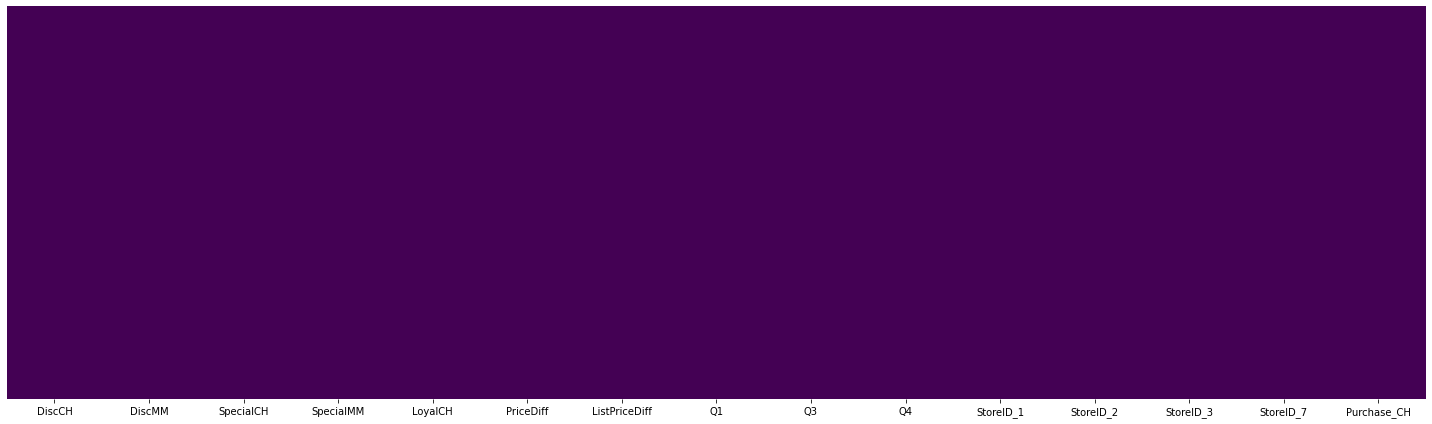

In [19]:
# Check if any missing values in the data

plt.figure(figsize=(20,6))
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')
plt.tight_layout()

In [20]:
df.isnull().sum()
# observation: no missing value

DiscCH           0
DiscMM           0
SpecialCH        0
SpecialMM        0
LoyalCH          0
PriceDiff        0
ListPriceDiff    0
Q1               0
Q3               0
Q4               0
StoreID_1        0
StoreID_2        0
StoreID_3        0
StoreID_7        0
Purchase_CH      0
dtype: int64

In [21]:
# Display the pre-processed data and info before moving onto the next stage
# Dataframe has 15 features and 1070 instances. Target feature is 'Purchase_CH'
df.head()
df.info()
df.describe()

,DiscCH,DiscMM,SpecialCH,SpecialMM,LoyalCH,PriceDiff,ListPriceDiff,Q1,Q3,Q4,StoreID_1,StoreID_2,StoreID_3,StoreID_7,Purchase_CH
1,0.00,0.0,0,0,0.500000,0.24,0.24,1,0,0,1,0,0,0,1
2,0.00,0.3,0,1,0.600000,-0.06,0.24,1,0,0,1,0,0,0,1
3,0.17,0.0,0,0,0.680000,0.40,0.23,0,0,0,1,0,0,0,1
4,0.00,0.0,0,0,0.400000,0.00,0.00,1,0,0,1,0,0,0,0
5,0.00,0.0,0,0,0.956535,0.00,0.00,1,0,0,0,0,0,1,1


<class 'pandas.core.frame.DataFrame'>
Int64Index: 1070 entries, 1 to 1070
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   DiscCH         1070 non-null   float64
 1   DiscMM         1070 non-null   float64
 2   SpecialCH      1070 non-null   int64  
 3   SpecialMM      1070 non-null   int64  
 4   LoyalCH        1070 non-null   float64
 5   PriceDiff      1070 non-null   float64
 6   ListPriceDiff  1070 non-null   float64
 7   Q1             1070 non-null   int32  
 8   Q3             1070 non-null   int32  
 9   Q4             1070 non-null   int32  
 10  StoreID_1      1070 non-null   uint8  
 11  StoreID_2      1070 non-null   uint8  
 12  StoreID_3      1070 non-null   uint8  
 13  StoreID_7      1070 non-null   uint8  
 14  Purchase_CH    1070 non-null   uint8  
dtypes: float64(5), int32(3), int64(2), uint8(5)
memory usage: 84.6 KB


,DiscCH,DiscMM,SpecialCH,SpecialMM,LoyalCH,PriceDiff,ListPriceDiff,Q1,Q3,Q4,StoreID_1,StoreID_2,StoreID_3,StoreID_7,Purchase_CH
count,1070.000000,1070.000000,1070.000000,1070.000000,1070.000000,1070.000000,1070.000000,1070.000000,1070.000000,1070.000000,1070.000000,1070.000000,1070.000000,1070.000000,1070.000000
mean,0.051860,0.123364,0.147664,0.161682,0.565782,0.146486,0.217991,0.241121,0.273832,0.307477,0.146729,0.207477,0.183178,0.332710,0.610280
std,0.117474,0.213834,0.354932,0.368331,0.307843,0.271563,0.107535,0.427964,0.446132,0.461664,0.354001,0.405689,0.386993,0.471404,0.487915
min,0.000000,0.000000,0.000000,0.000000,0.000011,-0.670000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.325257,0.000000,0.140000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.600000,0.230000,0.240000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,0.000000,0.230000,0.000000,0.000000,0.850873,0.320000,0.300000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000
max,0.500000,0.800000,1.000000,1.000000,0.999947,0.640000,0.440000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


# Standardized Data

In [22]:
# Standardize data before splitting into training and testing set
from sklearn.preprocessing import StandardScaler

# Create a StandardScaler() object called scaler
scaler = StandardScaler()

# Fit scaler to the features except the target feature 'Purchase_CH'
scaler.fit(df.drop('Purchase_CH',axis=1))

# Use the .transform() method to transform the features to a scaled version
scaled_features = scaler.transform(df.drop('Purchase_CH',axis=1))

StandardScaler()

In [23]:
# View the scaled data with header
x = pd.DataFrame(scaled_features,columns=df.columns[:14])
x.head()

,DiscCH,DiscMM,SpecialCH,SpecialMM,LoyalCH,PriceDiff,ListPriceDiff,Q1,Q3,Q4,StoreID_1,StoreID_2,StoreID_3,StoreID_7
0,-0.441664,-0.577188,-0.416228,-0.439164,-0.213788,0.344516,0.204766,1.774059,-0.614078,-0.666329,2.411491,-0.511657,-0.473557,-0.706116
1,-0.441664,0.826428,-0.416228,2.277053,0.111205,-0.760718,0.204766,1.774059,-0.614078,-0.666329,2.411491,-0.511657,-0.473557,-0.706116
2,1.006140,-0.577188,-0.416228,-0.439164,0.371200,0.933974,0.111730,-0.563679,-0.614078,-0.666329,2.411491,-0.511657,-0.473557,-0.706116
3,-0.441664,-0.577188,-0.416228,-0.439164,-0.538781,-0.539671,-2.028100,1.774059,-0.614078,-0.666329,2.411491,-0.511657,-0.473557,-0.706116
4,-0.441664,-0.577188,-0.416228,-0.439164,1.269920,-0.539671,-2.028100,1.774059,-0.614078,-0.666329,-0.414681,-0.511657,-0.473557,1.416198


# Q7 Task 2b - Split Train and Test 

In [24]:
# Split data into training and testing set 
from sklearn.model_selection import train_test_split

# y is the target
y = df['Purchase_CH']

# Test vs train ratio is 0.25: 0.75. Random state is set to 101
# Set up stratify parameter will preserve the proportion of target as in original dataset, in the train and test datasets as well
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.25, stratify=y, random_state=101)

# Print counts
# Y (train) counts: 1 (489); 0 (313)
print('Y (train) counts:')
print(y_train.value_counts())

# Y (test) counts: 1 (164); 0 (104)
print('Y (test) counts:')
print(y_test.value_counts())
    

Y (train) counts:
1    489
0    313
Name: Purchase_CH, dtype: int64
Y (test) counts:
1    164
0    104
Name: Purchase_CH, dtype: int64


# Q7 Task 2c - Build Models

In [25]:
# To begin, train data and evaluate with different models/ensembles
# Return a list of the performance of all the models and identify the top three to work with

from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import RidgeClassifier
from sklearn.ensemble import RandomForestClassifier, StackingClassifier, VotingClassifier, BaggingClassifier, ExtraTreesClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.experimental import enable_hist_gradient_boosting  

# import performance metrics packages
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, recall_score, precision_score, roc_auc_score

import time


def do_all_for_dataset(X_train, X_test, y_train, y_test):

    
    nb = GaussianNB()   
    lr = LogisticRegression(random_state=101, solver='lbfgs', max_iter=5000)
    dt = DecisionTreeClassifier(random_state=101)
    knn = KNeighborsClassifier(n_neighbors=7)
    rf = RandomForestClassifier(random_state=101, n_estimators=200)
    ada = AdaBoostClassifier(random_state=101, n_estimators=200)


    est_list = [('DT', dt), ('LR', lr), ('NB', nb), ('RF', rf), ('ADA', ada)]
       
    dict_classifiers = {
        "LR": lr, 
        "NB": nb,
        "DT": dt,
        "KNN": knn,
        "Voting": VotingClassifier(estimators = est_list, voting='soft'),
        "Bagging": BaggingClassifier(DecisionTreeClassifier(), n_estimators=200, random_state=101),
        "RF": rf,
        "ExtraTrees": ExtraTreesClassifier(random_state=101, n_estimators=200),
        "Adaboost": ada,
        "GBC": GradientBoostingClassifier(random_state=101, n_estimators=200),
        "Stacking": StackingClassifier(estimators=est_list, final_estimator=LogisticRegression()),
    }
    
    model_results = list()
    
    for model_name, model in dict_classifiers.items():
        start = time.time()
        y_pred = model.fit(X_train, y_train).predict(X_test)
        end = time.time()
        total = end - start
        
        accuracy       = accuracy_score(y_test, y_pred)
        f1             = f1_score(y_test, y_pred)
        recall         = recall_score(y_test, y_pred)
        precision      = precision_score(y_test, y_pred)
        roc_auc        = roc_auc_score(y_test, y_pred)
    
        df = pd.DataFrame({"Method"    : [model_name],
                           "Time"      : [total],
                           "Accuracy"  : [accuracy],
                           "Recall"    : [recall],
                           "Precision" : [precision],
                           "F1"        : [f1],
                           "AUC"       : [roc_auc],
                          })
        model_results.append(df)
   

    dataset_results = pd.concat([m for m in model_results], axis = 0).reset_index()

    dataset_results = dataset_results.drop(columns = "index",axis =1)
    # Evaluate based on accuracy and F1 score. For preliminary, sort by accuracy
    dataset_results = dataset_results.sort_values(by=['Accuracy'], ascending=False)
    dataset_results['Rank'] = range(1, len(dataset_results)+1)
    
    return dataset_results

In [26]:
# Save the results of each dataset into a list
results = list()

In [27]:
# Call function with input parameters define from the split training and testing section
r = do_all_for_dataset(X_train, X_test, y_train, y_test)

# Append results into the list
results.append(r)

# View result list
r

# Uncomment this line to export the result list to csv
# r.to_csv('rank.csv')

# Result: LR, Adaboost and GBC are the top 3 models
# Accuracy: LR 0.854478; Adaboost 0.839552; GBC 0.835821
# F1: LR 0.883582; Adaboost 0.870871; GBC 0.865854
# Work on these three models next to fine tune

,Method,Time,Accuracy,Recall,Precision,F1,AUC,Rank
0,LR,0.013962,0.854478,0.902439,0.865497,0.883582,0.840643,1
8,Adaboost,0.272272,0.839552,0.884146,0.857988,0.870871,0.826689,2
9,GBC,0.191676,0.835821,0.865854,0.865854,0.865854,0.827158,3
10,Stacking,3.128127,0.832090,0.878049,0.852071,0.864865,0.818832,4
5,Bagging,0.409140,0.813433,0.829268,0.860759,0.844720,0.808865,5
4,Voting,0.603488,0.805970,0.823171,0.854430,0.838509,0.801008,6
6,RF,0.279254,0.791045,0.810976,0.841772,0.826087,0.785295,7
3,KNN,0.014960,0.768657,0.847561,0.789773,0.817647,0.745896,8
2,DT,0.007978,0.764925,0.774390,0.830065,0.801262,0.762195,9
1,NB,0.002992,0.753731,0.743902,0.835616,0.787097,0.756567,10


# Pre-define functions for plots

In [28]:
from sklearn.metrics import roc_curve, auc, classification_report, cohen_kappa_score,log_loss
def plot_roc(clf, X_test, y_test, name, ax, show_thresholds=True):
    y_pred_rf = clf.predict_proba(X_test)[:, 1]
    fpr, tpr, thr = roc_curve(y_test, y_pred_rf)

    ax.plot([0, 1], [0, 1], 'k--');
    ax.plot(fpr, tpr, label='{}, AUC={:.2f}'.format(name, auc(fpr, tpr)));
    ax.scatter(fpr, tpr);

    if show_thresholds:
        for i, th in enumerate(thr):
            ax.text(x=fpr[i], y=tpr[i], s="{:.2f}".format(th), fontsize=10, 
                     horizontalalignment='left', verticalalignment='top', color='black',
                     bbox=dict(facecolor='white', edgecolor='black', boxstyle='round,pad=0.1', alpha=0.1));
        
    ax.set_xlabel('False positive rate', fontsize=18);
    ax.set_ylabel('True positive rate', fontsize=18);
    ax.tick_params(axis='both', which='major', labelsize=12);
    ax.grid(True);
    ax.set_title('ROC Curve', fontsize=18)

# Logistic Regression

In [29]:
from sklearn.linear_model import LogisticRegression

# Parameters identified from GridSearchCV (in the Hyperparameter Tuning section)
# With this setting, the accuracy (0.83 instead of 0.85) and F1 score dropped slightly
# lr_clf = LogisticRegression(random_state=101, class_weight='balanced', C = 1, solver='liblinear',max_iter=5000)

# Apply this set of parameters from Hyperparameter Tuning (without class_weight='balanced' and generated this set)
lr_clf = LogisticRegression(random_state=101, C = 1, solver='lbfgs')

lr_clf.fit(X_train, y_train)

LogisticRegression(C=1, random_state=101)

In [30]:
# Predict using LR model
y_pred_lr = lr_clf.predict(X_test)

In [31]:
# LR Model performance
# Print confusion matrix
print(confusion_matrix(y_test, y_pred_lr))

[[ 81  23]
 [ 16 148]]


In [32]:
# Print classification report
print(classification_report(y_test, y_pred_lr))

              precision    recall  f1-score   support

           0       0.84      0.78      0.81       104
           1       0.87      0.90      0.88       164

    accuracy                           0.85       268
   macro avg       0.85      0.84      0.84       268
weighted avg       0.85      0.85      0.85       268



In [33]:
# Print accuracy, kappa, F1 and log loss
print("Accuracy = {:.2f}".format(accuracy_score(y_test, y_pred_lr)))
print("Kappa = {:.2f}".format(cohen_kappa_score(y_test, y_pred_lr)))
print("F1 Score = {:.2f}".format(f1_score(y_test, y_pred_lr)))
print("Log Loss = {:.2f}".format(log_loss(y_test, y_pred_lr)))

Accuracy = 0.85
Kappa = 0.69
F1 Score = 0.88
Log Loss = 5.03


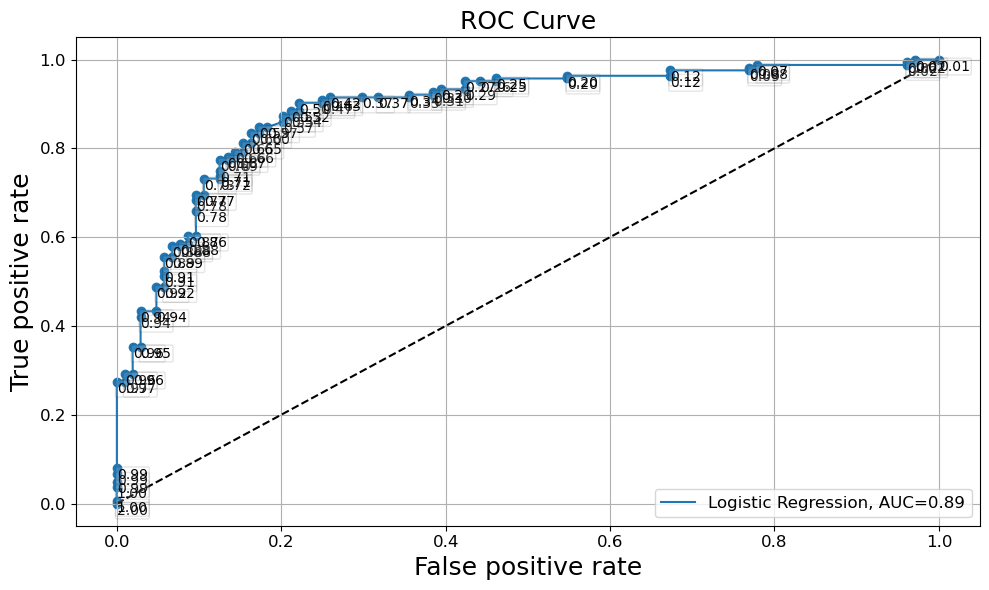

In [34]:
# Plot ROC curve for LR
plt.style.use('default')
figure = plt.figure(figsize=(10, 6))
ax = plt.subplot(1, 1, 1)
plot_roc(lr_clf, X_test, y_test, "Logistic Regression", ax)
plt.legend(loc='lower right', fontsize=12)
plt.tight_layout()

In [35]:
# Interpreting LR model
# View the coefficient and intercept

feat = df.columns[:14]
df_lrcoef = pd.DataFrame(lr_clf.coef_).transpose()
df_lrcoef.columns =['coefficient'] 
df_feat = pd.DataFrame(feat,columns=['features'])

df_lrcoef = pd.concat([df_feat,df_lrcoef],axis=1)
df_lrcoef

,features,coefficient
0,DiscCH,0.305680
1,DiscMM,-0.272539
2,SpecialCH,-0.036449
3,SpecialMM,-0.018219
4,LoyalCH,1.894494
5,PriceDiff,0.470083
6,ListPriceDiff,0.311242
7,Q1,0.154297
8,Q3,-0.054655
9,Q4,0.150147


In [36]:
# LR model intercept: 0.82907609
lr_clf.intercept_


array([0.82907609])

In [37]:
# Create a Dataframe that has the test data and the predicted value
feat_name = list(df.columns[:14].values)
df_X_test = pd.DataFrame(scaler.inverse_transform(X_test[:]),columns = feat_name)
df_y_pred = pd.DataFrame(y_pred_lr, columns=['Pred_Purchase_CH'])

df_lr = pd.concat([df_X_test,df_y_pred],axis=1)
df_lr

# Export the result to csv. Uncomment this line to export file
# df_lr.to_csv('LR_prediction.csv')


,DiscCH,DiscMM,SpecialCH,SpecialMM,LoyalCH,PriceDiff,ListPriceDiff,Q1,Q3,Q4,StoreID_1,StoreID_2,StoreID_3,StoreID_7,Pred_Purchase_CH
0,0.00,4.000000e-01,1.0,0.0,0.500000,-0.16,0.24,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1
1,0.00,8.000000e-01,0.0,1.0,0.210886,-0.58,0.22,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0
2,0.00,1.387779e-17,0.0,0.0,0.900647,0.32,0.32,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1
3,0.10,4.000000e-01,1.0,0.0,0.691063,-0.20,0.10,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1
4,0.00,1.387779e-17,0.0,0.0,0.131072,0.24,0.24,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
263,0.27,1.387779e-17,0.0,0.0,0.868928,0.54,0.27,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1
264,0.00,1.387779e-17,0.0,0.0,0.671172,0.32,0.32,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1
265,0.20,4.000000e-01,0.0,0.0,0.819719,-0.20,0.00,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1
266,0.00,1.387779e-17,0.0,0.0,0.256000,0.30,0.30,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0


# AdaBoost

In [38]:
# Parameters identified from GridSearchCV (in the Tuning section)
ada_clf = AdaBoostClassifier(random_state=101, n_estimators=100)

ada_clf.fit(X_train, y_train)

AdaBoostClassifier(n_estimators=100, random_state=101)

In [39]:
# Predict using AdaBoost model
# Print confusion matrix
y_pred_ada = ada_clf.predict(X_test)

In [40]:
# AdaBoost model performance

print(confusion_matrix(y_test, y_pred_ada))


[[ 79  25]
 [ 18 146]]


In [41]:
# Print classification report
print(classification_report(y_test, y_pred_ada))

              precision    recall  f1-score   support

           0       0.81      0.76      0.79       104
           1       0.85      0.89      0.87       164

    accuracy                           0.84       268
   macro avg       0.83      0.82      0.83       268
weighted avg       0.84      0.84      0.84       268



In [42]:
# Print accuracy, kappa, F1 and log loss
print("Accuracy = {:.2f}".format(accuracy_score(y_test, y_pred_ada)))
print("Kappa = {:.2f}".format(cohen_kappa_score(y_test, y_pred_ada)))
print("F1 Score = {:.2f}".format(f1_score(y_test, y_pred_ada)))
print("Log Loss = {:.2f}".format(log_loss(y_test, y_pred_ada)))


Accuracy = 0.84
Kappa = 0.66
F1 Score = 0.87
Log Loss = 5.54


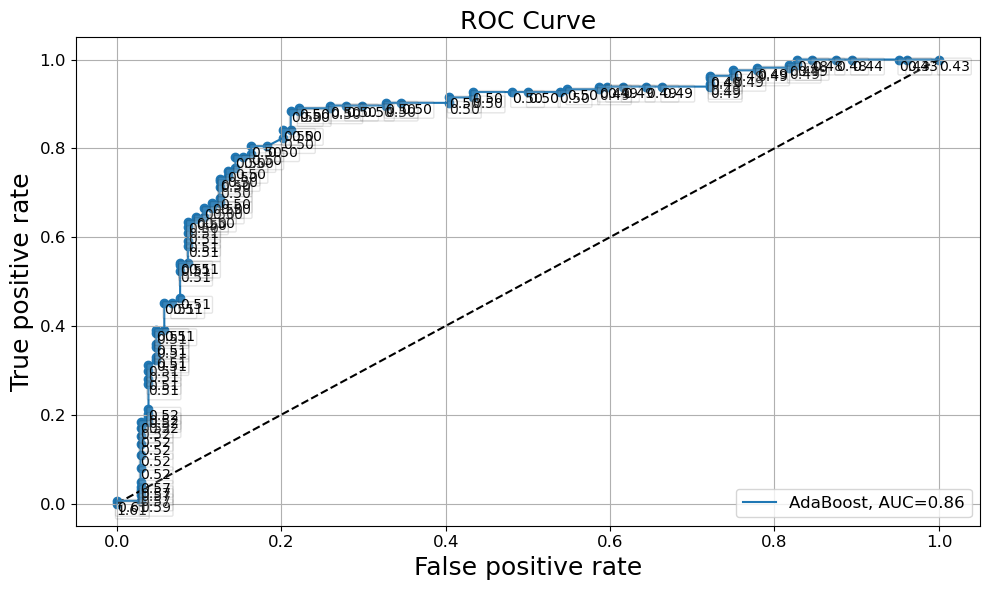

In [43]:
# Plot ROC curve for AdaBoost
plt.style.use('default')
figure = plt.figure(figsize=(10, 6))
ax = plt.subplot(1, 1, 1)
plot_roc(ada_clf, X_test, y_test, "AdaBoost", ax)
plt.legend(loc='lower right', fontsize=12)
plt.tight_layout()

# GradientBoostingClassifier

In [44]:
# Parameters identified from GridSearchCV (in the Tuning section) but result turns out 0.01 less accurate with this set
#gbc_clf = GradientBoostingClassifier(random_state=101, n_estimators=100, max_features='log2')

# Removed max_features from GridSearchCV and this is another set of best parameter
gbc_clf = GradientBoostingClassifier(random_state=101, n_estimators=50)
gbc_clf.fit(X_train, y_train)

GradientBoostingClassifier(n_estimators=50, random_state=101)

In [45]:
# Predict using GradientBoostingClassifier model
y_pred_gbc = gbc_clf.predict(X_test)

In [46]:
# GBC model performance
# Print confusion matrix
print(confusion_matrix(y_test, y_pred_gbc))

[[ 79  25]
 [ 19 145]]


In [47]:
# Print classification report
print(classification_report(y_test, y_pred_gbc))

              precision    recall  f1-score   support

           0       0.81      0.76      0.78       104
           1       0.85      0.88      0.87       164

    accuracy                           0.84       268
   macro avg       0.83      0.82      0.83       268
weighted avg       0.83      0.84      0.83       268



In [48]:
# Print accuracy, kappa, F1 and log loss
print("Accuracy = {:.2f}".format(accuracy_score(y_test, y_pred_gbc)))
print("Kappa = {:.2f}".format(cohen_kappa_score(y_test, y_pred_gbc)))
print("F1 Score = {:.2f}".format(f1_score(y_test, y_pred_gbc)))
print("Log Loss = {:.2f}".format(log_loss(y_test, y_pred_gbc)))

Accuracy = 0.84
Kappa = 0.65
F1 Score = 0.87
Log Loss = 5.67


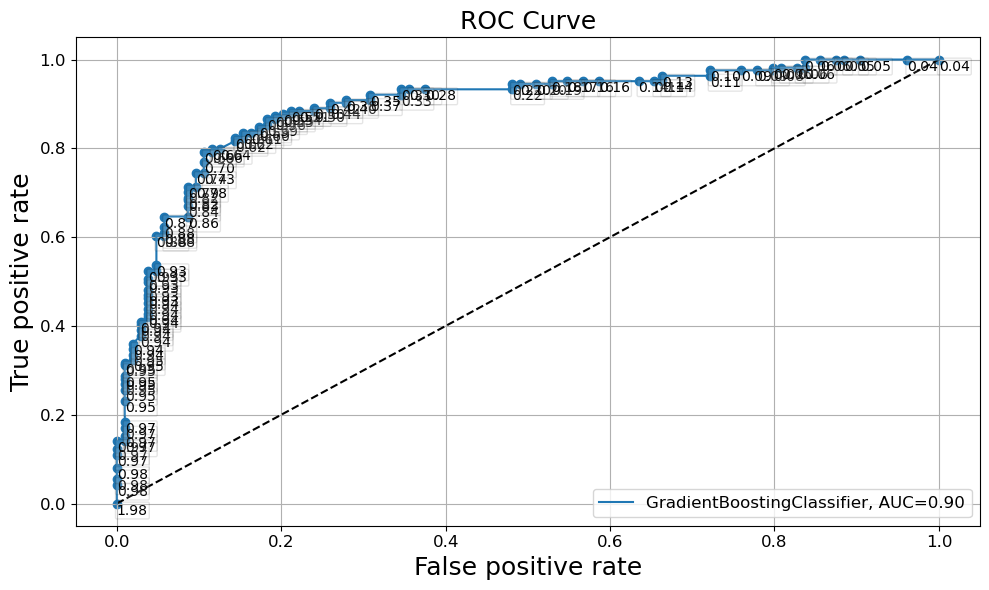

In [49]:
# Plot ROC curve for GBC
plt.style.use('default')
figure = plt.figure(figsize=(10, 6))
ax = plt.subplot(1, 1, 1)
plot_roc(gbc_clf, X_test, y_test, "GradientBoostingClassifier", ax)
plt.legend(loc='lower right', fontsize=12)
plt.tight_layout()

# Hyperparameter Tuning

In [50]:
# Tuning using GridSearchCV to find the optimal parameters. Choosing the best values for hyperparameters for the three models
from sklearn.model_selection import GridSearchCV

In [51]:
# Logistic Regression Hyperparameter Tuning
param_grid = {'C':[1,10,100,1000,10000],'solver': ['lbfgs', 'liblinear']} 
grid = GridSearchCV(LogisticRegression(),param_grid,verbose=3)

In [52]:
grid.fit(X_train, y_train)
# Result: Done  50 out of  50 | elapsed:    0.2s finished

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] C=1, solver=lbfgs ...............................................
[CV] ................... C=1, solver=lbfgs, score=0.870, total=   0.0s
[CV] C=1, solver=lbfgs ...............................................
[CV] ................... C=1, solver=lbfgs, score=0.801, total=   0.0s
[CV] C=1, solver=lbfgs ...............................................
[CV] ................... C=1, solver=lbfgs, score=0.844, total=   0.0s
[CV] C=1, solver=lbfgs ...............................................
[CV] ................... C=1, solver=lbfgs, score=0.800, total=   0.0s
[CV] C=1, solver=lbfgs ...............................................
[CV] ................... C=1, solver=lbfgs, score=0.812, total=   0.0s
[CV] C=1, solver=liblinear ...........................................
[CV] ............... C=1, solver=liblinear, score=0.870, total=   0.0s
[CV] C=1, solver=liblinear ...........................................
[CV] ...........

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


[CV] ............. C=100, solver=liblinear, score=0.838, total=   0.0s
[CV] C=100, solver=liblinear .........................................
[CV] ............. C=100, solver=liblinear, score=0.800, total=   0.0s
[CV] C=100, solver=liblinear .........................................
[CV] ............. C=100, solver=liblinear, score=0.812, total=   0.0s
[CV] C=1000, solver=lbfgs ............................................
[CV] ................ C=1000, solver=lbfgs, score=0.870, total=   0.0s
[CV] C=1000, solver=lbfgs ............................................
[CV] ................ C=1000, solver=lbfgs, score=0.801, total=   0.0s
[CV] C=1000, solver=lbfgs ............................................
[CV] ................ C=1000, solver=lbfgs, score=0.838, total=   0.0s
[CV] C=1000, solver=lbfgs ............................................
[CV] ................ C=1000, solver=lbfgs, score=0.800, total=   0.0s
[CV] C=1000, solver=lbfgs ............................................
[CV] .

[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:    0.2s finished


GridSearchCV(estimator=LogisticRegression(),
             param_grid={'C': [1, 10, 100, 1000, 10000],
                         'solver': ['lbfgs', 'liblinear']},
             verbose=3)

In [53]:
grid.best_params_
# Result:  {'C': 1, 'solver': 'lbfgs'}

{'C': 1, 'solver': 'lbfgs'}

In [54]:
grid.best_estimator_
# Result: LogisticRegression(C=1)

LogisticRegression(C=1)

In [55]:
# AdaBoost Hyperparameter Tuning
param_grid = {'n_estimators':[50,100,200,400,800,1000,2000]} 
grid_ada = GridSearchCV(AdaBoostClassifier(),param_grid,verbose=3)


In [56]:
grid_ada.fit(X_train, y_train)
# Result: Done  35 out of  35 | elapsed:   29.5s finished

Fitting 5 folds for each of 7 candidates, totalling 35 fits
[CV] n_estimators=50 .................................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


[CV] ..................... n_estimators=50, score=0.820, total=   0.1s
[CV] n_estimators=50 .................................................
[CV] ..................... n_estimators=50, score=0.764, total=   0.1s
[CV] n_estimators=50 .................................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.1s remaining:    0.0s


[CV] ..................... n_estimators=50, score=0.825, total=   0.1s
[CV] n_estimators=50 .................................................
[CV] ..................... n_estimators=50, score=0.819, total=   0.1s
[CV] n_estimators=50 .................................................
[CV] ..................... n_estimators=50, score=0.787, total=   0.1s
[CV] n_estimators=100 ................................................
[CV] .................... n_estimators=100, score=0.820, total=   0.1s
[CV] n_estimators=100 ................................................
[CV] .................... n_estimators=100, score=0.783, total=   0.2s
[CV] n_estimators=100 ................................................
[CV] .................... n_estimators=100, score=0.819, total=   0.2s
[CV] n_estimators=100 ................................................
[CV] .................... n_estimators=100, score=0.806, total=   0.2s
[CV] n_estimators=100 ................................................
[CV] .

[Parallel(n_jobs=1)]: Done  35 out of  35 | elapsed:   29.5s finished


GridSearchCV(estimator=AdaBoostClassifier(),
             param_grid={'n_estimators': [50, 100, 200, 400, 800, 1000, 2000]},
             verbose=3)

In [57]:
grid_ada.best_params_
# Result: {'n_estimators': 100}

{'n_estimators': 100}

In [58]:
grid_ada.best_estimator_
# Result: AdaBoostClassifier(n_estimators=100)

AdaBoostClassifier(n_estimators=100)

In [59]:
# GradientBoostClassifier Hyperparameter Tuning
param_grid_gbc = {'n_estimators':[50,100,200,400,800,1000,2000],'loss' : ['deviance', 'exponential'] } 
grid_gbc = GridSearchCV(GradientBoostingClassifier(),param_grid_gbc,verbose=3)


In [60]:
grid_gbc.fit(X_train, y_train)
# Result: Done  70 out of  70 | elapsed:   35.2s finished

Fitting 5 folds for each of 14 candidates, totalling 70 fits
[CV] loss=deviance, n_estimators=50 ..................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


[CV] ...... loss=deviance, n_estimators=50, score=0.845, total=   0.0s
[CV] loss=deviance, n_estimators=50 ..................................
[CV] ...... loss=deviance, n_estimators=50, score=0.789, total=   0.0s
[CV] loss=deviance, n_estimators=50 ..................................
[CV] ...... loss=deviance, n_estimators=50, score=0.844, total=   0.0s
[CV] loss=deviance, n_estimators=50 ..................................
[CV] ...... loss=deviance, n_estimators=50, score=0.794, total=   0.0s
[CV] loss=deviance, n_estimators=50 ..................................
[CV] ...... loss=deviance, n_estimators=50, score=0.806, total=   0.0s
[CV] loss=deviance, n_estimators=100 .................................
[CV] ..... loss=deviance, n_estimators=100, score=0.826, total=   0.1s
[CV] loss=deviance, n_estimators=100 .................................
[CV] ..... loss=deviance, n_estimators=100, score=0.783, total=   0.1s
[CV] loss=deviance, n_estimators=100 .................................
[CV] .

[CV] .. loss=exponential, n_estimators=800, score=0.812, total=   0.6s
[CV] loss=exponential, n_estimators=800 ..............................
[CV] .. loss=exponential, n_estimators=800, score=0.769, total=   0.6s
[CV] loss=exponential, n_estimators=1000 .............................
[CV] . loss=exponential, n_estimators=1000, score=0.770, total=   0.8s
[CV] loss=exponential, n_estimators=1000 .............................
[CV] . loss=exponential, n_estimators=1000, score=0.764, total=   0.8s
[CV] loss=exponential, n_estimators=1000 .............................
[CV] . loss=exponential, n_estimators=1000, score=0.794, total=   0.8s
[CV] loss=exponential, n_estimators=1000 .............................
[CV] . loss=exponential, n_estimators=1000, score=0.825, total=   0.8s
[CV] loss=exponential, n_estimators=1000 .............................
[CV] . loss=exponential, n_estimators=1000, score=0.775, total=   0.8s
[CV] loss=exponential, n_estimators=2000 .............................
[CV] .

[Parallel(n_jobs=1)]: Done  70 out of  70 | elapsed:   34.9s finished


GridSearchCV(estimator=GradientBoostingClassifier(),
             param_grid={'loss': ['deviance', 'exponential'],
                         'n_estimators': [50, 100, 200, 400, 800, 1000, 2000]},
             verbose=3)

In [61]:
grid_gbc.best_params_
# Result: {'loss': 'deviance', 'n_estimators': 50}

{'loss': 'deviance', 'n_estimators': 50}

In [62]:
grid_gbc.best_estimator_
# Result: GradientBoostingClassifier(n_estimators=50)

GradientBoostingClassifier(n_estimators=50)